In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

In [29]:
folder_path = os.path.join(os.getcwd(),'ddf--datapoints--population--by--country--age--gender--year')
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in os.listdir(folder_path) if file.endswith('csv')]
countries = random.sample(range(len(dfs)), 5)
country_dict = dict()
for c in countries:
    country = dfs[c]['country'].iloc[0]
    country_dict[country] = dfs[c]

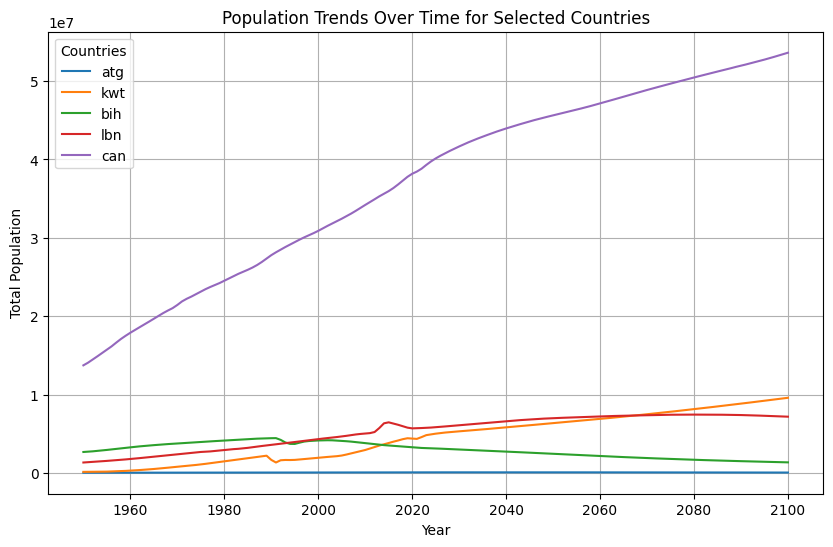

In [30]:
# 1. Create a line plot comparing total population over time:
#    - Choose 5 countries
#    - Calculate the total population by country for each year
#    - Create a line plot showing population trends
#    - Include a legend identifying each country
#    - Add appropriate axis labels and title
#    - Use different line styles or colors to distinguish the countries
# Group by year and sum population

# yearly_total = df.groupby('year')['population'].sum()

plt.figure(figsize=(10, 6))

for c in country_dict:
    country_df = country_dict[c]
    yearly_total = country_df.groupby('year')['population'].sum()
    plt.plot(yearly_total.index, yearly_total.values, label=c)

plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Population Trends Over Time for Selected Countries')
plt.legend(title="Countries")
plt.grid(True)

/var/folders/kr/g62786hn2gv2rfh_3_8d93hw0000gn/T/ipykernel_45638/918791293.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)


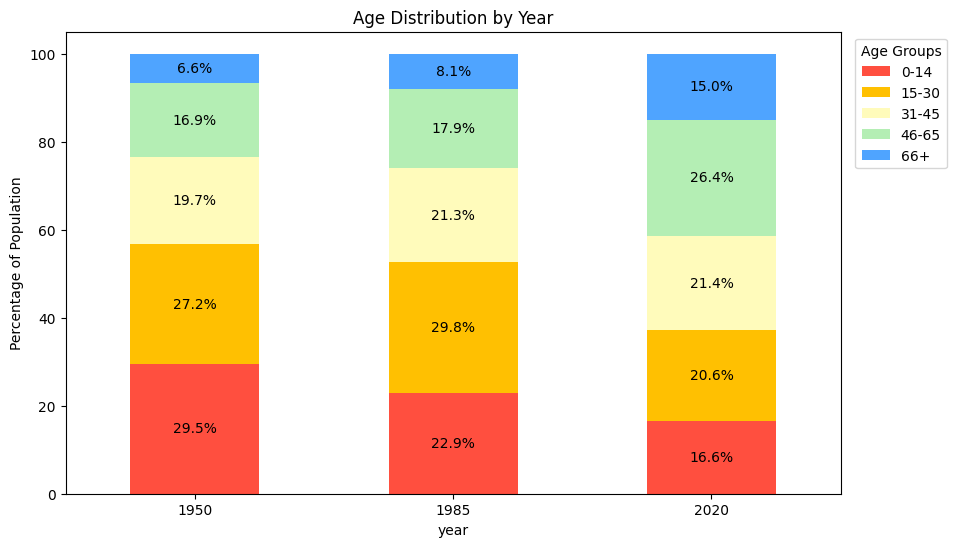

In [81]:
# 2. Investigate demographic shifts using a stacked bar chart:
#    - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
#    - Create a stacked bar chart showing these changes
#    - Calculate and display the percentage for each age group
#    - Add text annotations showing key percentages
#    - Include clear labels and a legend

# # Filter specific age groups
# age_groups = df[df['age'].isin(['0-4', '5-9', '10-14'])]

# # Calculate gender ratios
# gender_ratio = df.groupby('year').agg({
#     'population': lambda x: x[df['gender']=='f'].sum() / x[df['gender']=='m'].sum()
# })

age_bins = [0, 14, 30, 45, 65, float('inf')]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

years = [1950, 1985, 2020]

country_dfs = pd.concat(country_dict.values(), ignore_index=True)
data = country_dfs[country_dfs['year'].isin(years)]
#create age group category and place data into bins
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

#get population by age groups and calculate % of the total
age_distribution = data.groupby(['year', 'age_group'])['population'].sum().unstack()
age_distribution_percentage = age_distribution.div(age_distribution.sum(axis=1), axis=0)*100

# print(age_distribution_percentage)

fig, ax = plt.subplots(figsize=(10, 6))

#bar plot stacked
age_distribution_percentage.plot(kind='bar', stacked=True, ax=ax, color=['#ff4f3f', '#ffc001', '#fffbbb', '#b4eeb4', '#4fa4ff'])

#iterate over years
for i in range(len(age_distribution_percentage)):
    #iterate overage groups
    for j in range(len(age_distribution_percentage.columns)):
        #get and and plot percentage of each age group in each year
        percentage = age_distribution_percentage.iloc[i, j]
        ax.text(i, age_distribution_percentage.iloc[i, :j+1].sum() - percentage/2, f'{percentage:.1f}%', va='center', ha='center')

ax.set_ylabel('Percentage of Population')
ax.set_title('Age Distribution by Year')
ax.set_xticklabels(age_distribution_percentage.index, rotation=0)
# put legend outside plot
ax.legend(title='Age Groups', loc='upper left', bbox_to_anchor=(1.01, 1))
plt.show()


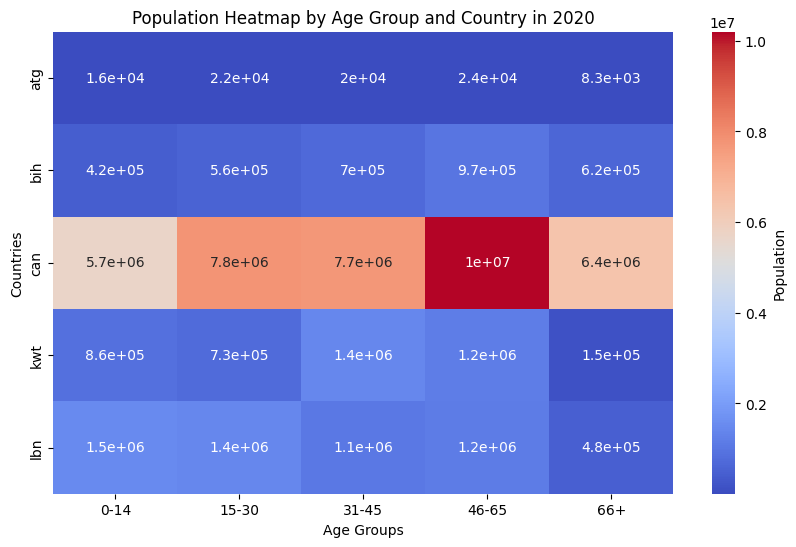

'\nThe heatmap shows the distribution of populations across different age groups for selected countries in 2020.\nEach cell represents the total population for a specific age group and country, with darker colors indicating higher populations.\nThis visualization allows us to quickly compare the demographic structure of each country, revealing patterns such as \nyounger populations in some countries versus older populations in others.\n'

In [89]:
# 1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
#    - Use seaborn's heatmap function
#    - Add clear annotations and labels
#    - Write a brief explanation of what the heatmap reveals about the population structure


heatmap_data = data[data['year'] == 2020]

heatmap_pivot = heatmap_data.pivot_table(index='country', columns='age_group', values='population', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot, cmap='coolwarm', annot=True, cbar_kws={'label': 'Population'})
plt.title(f'Population Heatmap by Age Group and Country in 2020')
plt.xlabel('Age Groups')
plt.ylabel('Countries')
plt.show()

'''
We observe out of the 5 countries chosen, can has the largest population across all age groups,
while atg has the lowest population across all groups. Can has the greatest population for ages
45-65, and atg has the lowest population for ages 66+
Note: i randomized the 5 countries, so my plot will be different; i have included the heatmap I 
analyzed in the folder as seaborn#1.png
'''

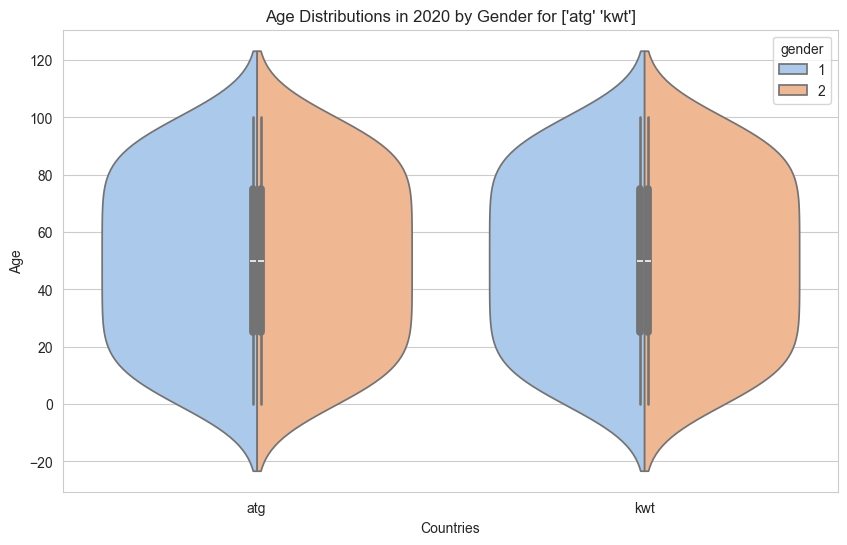

'\nThe age distributions of males and females for countries atg and kwt look exactly the same suspiciously.\nWith further inspection from looking at the distributions of their original dfs, we observe that the\nage distributions are indeed the exact same (by chance or not) without splitting by gender. The \ndistributions are also symmetrical about both the x and y axis.\nNote: once again, these two countries were randomized, i included my output in the folder as seaborn#2.png\n'

In [120]:
# 2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
#    - Create side-by-side violin plots using seaborn
#    - Add clear labels and a title
#    - Write a brief comparison of what the plots reveal

sns.set_style("whitegrid")

two_countries = country_dfs['country'].unique()[:2]
violin_data = country_dfs[(country_dfs['year'] == 2020) & 
                            (country_dfs['country'].isin(two_countries))]

plt.figure(figsize=(10, 6))
sns.violinplot(violin_data, x='country', y='age', hue='gender', palette="pastel", split=True)
plt.title(f'Age Distributions in 2020 by Gender for {two_countries}')
plt.xlabel('Countries')
plt.ylabel('Age')
plt.show()


# print(violin_data[violin_data['country'] == 'atg'].describe())
# print(violin_data[violin_data['country'] == 'kwt'].describe())

# print(country_dfs[country_dfs['country'] == 'atg'].describe())
# print(country_dfs[country_dfs['country'] == 'kwt'].describe())

"""
The age distributions of males and females for countries atg and kwt look exactly the same suspiciously.
With further inspection from looking at the distributions of their original dfs, we observe that the
age distributions are indeed the exact same (by chance or not) without splitting by gender. The 
distributions are also symmetrical about both the x and y axis.
Note: once again, these two countries were randomized, i included my output in the folder as seaborn#2.png
"""


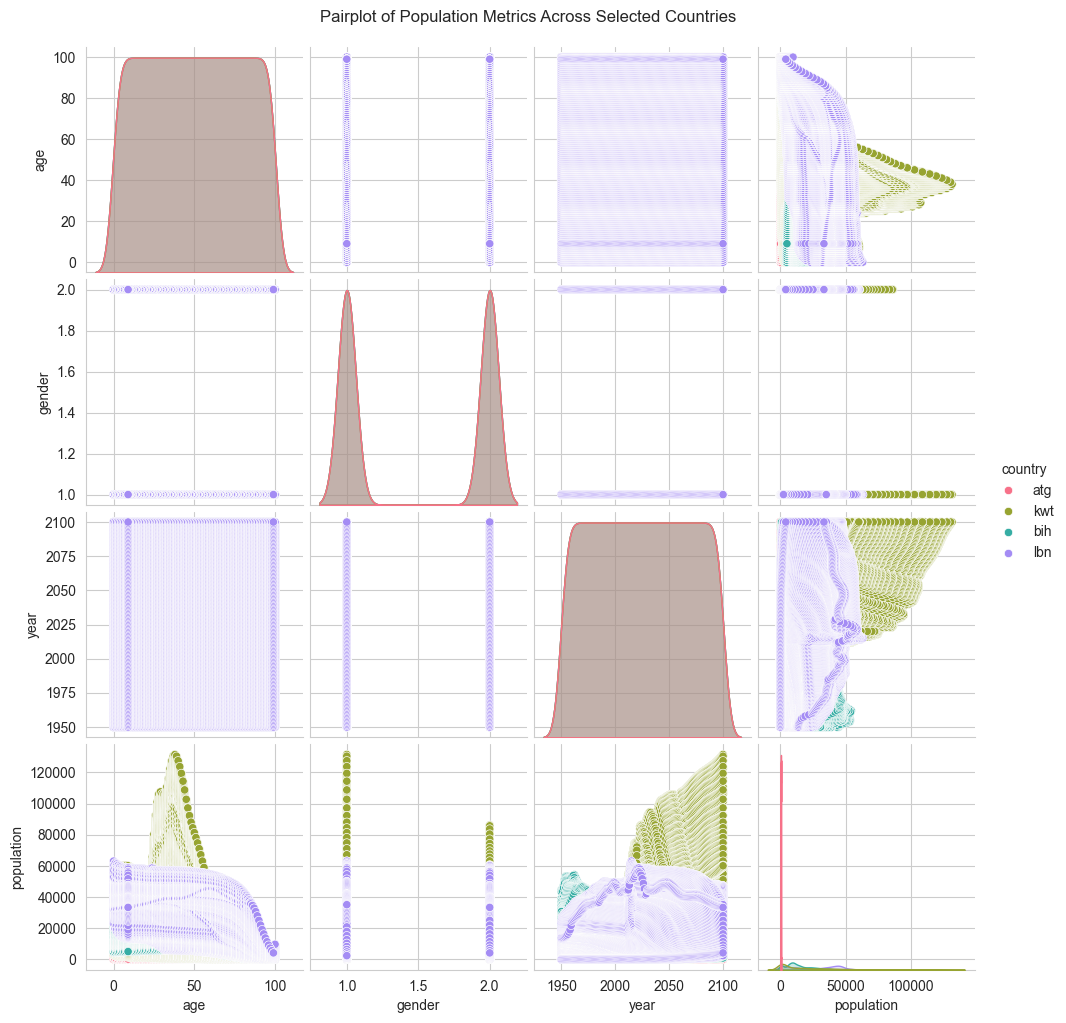

'\nThe pairplot compares various population metrics across four selected countries. \nBy visualizing the relationships between the variables, we can identify trends such as \nhow population varies with age, gender distribution, and year. \nCertain countries may cluster together, indicating similar demographic characteristics, \nwhile others stand out with unique population structures.\n'

In [127]:
# 3. Create a pairplot comparing population metrics across four countries:
#    - Select four countries of your choice
#    - Include all variables in the dataset
#    - Use the country as the hue parameter to distinguish between countries
#    - Write a brief summary of any patterns or relationships revealed by the pairplot

sns.set_style("whitegrid")

four_countries = country_dfs['country'].unique()[:4]

pairplot_data = country_dfs[country_dfs['country'].isin(four_countries)]

sns.pairplot(pairplot_data, hue='country', palette='husl')
plt.suptitle('Pairplot of Population Metrics Across Selected Countries', y=1.02)
plt.show()

"""
It's a bit hard to see but, we have the pair plot of age, gender, population, and year plotted against 
each other, colored by four  countries. We observe the distribution of gender looks the same across 
all since all the points overlap; the age and population seems to vary immensely as the distributions 
all look different, with kwt has a narrower and taller distribution, whereas lbn has a wider and 
shallower distribution when comparing age and population; bih seems skewed right comparing population
and year, though it is hard to see clearly
Note: attached image output as seaborn#3.png  
"""

